
# Importing necessary libraries
1. Importing pandas, matplotlib libraries and some other functions from sklearn libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline


# Data preparation
1. The df dataframe is created by reading the Product Demand Forecasting Model.xlsx file and retriving the data in excel sheet named 'Data'.
2. The independent variables 'Shop ID','Discounted price', and 'Base Price' are passed to dataframe X and dependent variable that predicts the demand, 'Products Sold' is passed the dataframe Y.
3. The dataframes X_train,X_test,Y_train, and Y_test are created from the function train_test_split of X and Y with test_size of 30%

In [2]:
df=pd.read_excel("C:\\Users\\admin\\Downloads\\Product Demand Forecasting Model.xlsx",sheet_name="Data")
X= df[['Shop ID','Discounted price','Base Price']]
Y= df[['Products Sold']]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)


# Identifying the best value of n_neighbors for the KNeighborsRegressor
1. The value of mean_squared_error between Y_test and Y_pred is calculated for different values of n_neighbor between 1 and 100 using the for-loop function.
2. The values of mean_squared_error is appended to the list p.
3. The different values of n_neighbors and resulting mean_squared_error were plotted against each other using 'plot' function in matplotlib. 

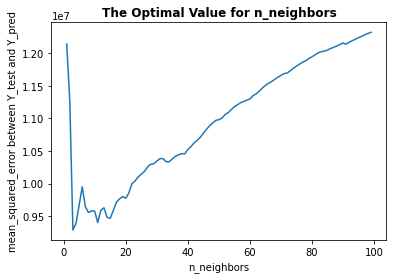

In [3]:
p=[]
for n_neighbors in range(1,100):
    clf= KNeighborsRegressor(n_neighbors)
    clf.fit(X_train,Y_train)
    Y_pred= clf.predict(X_test)
    p.append(mean_squared_error(Y_test, Y_pred))
plt.plot(range(1,100),p)
plt.xlabel('n_neighbors')
plt.ylabel('mean_squared_error between Y_test and Y_pred')
plt.title('The Optimal Value for n_neighbors', fontweight='bold')
plt.show()

It can be understood that for the value of n_neighbors= 3, the value of mean_squared_error is minimal


# Predicting Approximate Demand
1. The value for Shop ID, Discounted price and Base price are sought from user and provided to the X_test.
2. A classifier is developed using KNeighborsRegressor with n_neighbors=3
3. The training dataset X_train (data) and Y_train (target) are fitted into the classifier clf.
4. The Y_pred is predicted by providing X_test dataset using the clf.predict function.

In [7]:
X_test= [[float(input("Enter the Shop ID (Use valid Shop ID): ")),
          float(input("Enter the Discounted price: ")), 
          float(input("Enter the Base Price: "))]]
clf= KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train,Y_train)
Y_pred= clf.predict(X_test)
print("\nThe Predicted Demand for the Product will be: ",int(Y_pred[0][0]))

Enter the Shop ID (Use valid Shop ID): 361035
Enter the Discounted price: 4424
Enter the Base Price: 3975

The Predicted Demand for the Product will be:  11190


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
